In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
zip_path = "/content/drive/MyDrive/creditcard/archive (12).zip"
extract_folder = "/content/drive/MyDrive/Creditcard/extracted_data"


In [ ]:
import zipfile
import os

# Extract files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Extraction completed. Files are in:", extract_folder)


Extraction completed. Files are in: /content/drive/MyDrive/Creditcard/extracted_data


In [ ]:
import pandas as pd
import os

# Define file paths
file_path_train = "/content/drive/MyDrive/Creditcard/extracted_data/fraudTrain.csv"
file_path_test = "/content/drive/MyDrive/Creditcard/extracted_data/fraudTest.csv"

# Load datasets
fraud_train = pd.read_csv(file_path_train)
fraud_test = pd.read_csv(file_path_test)

# Display first few rows
fraud_train.head()


Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [ ]:
columns_needed = ['cc_num', 'merchant', 'amt', 'is_fraud']
fraud_train = fraud_train[columns_needed]
fraud_test = fraud_test[columns_needed]

# Rename columns for easier processing
fraud_train.rename(columns={'cc_num': 'customer', 'amt': 'amount', 'is_fraud': 'fraudulent'}, inplace=True)
fraud_test.rename(columns={'cc_num': 'customer', 'amt': 'amount', 'is_fraud': 'fraudulent'}, inplace=True)

# Display first few rows
fraud_train.head()


<ipython-input-6-d5beec914aac>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_train.rename(columns={'cc_num': 'customer', 'amt': 'amount', 'is_fraud': 'fraudulent'}, inplace=True)
<ipython-input-6-d5beec914aac>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_test.rename(columns={'cc_num': 'customer', 'amt': 'amount', 'is_fraud': 'fraudulent'}, inplace=True)


customer                            merchant  amount  fraudulent
0  2703186189652095          fraud_Rippin, Kub and Mann    4.97           0
1      630423337322     fraud_Heller, Gutmann and Zieme  107.23           0
2    38859492057661                fraud_Lind-Buckridge  220.11           0
3  3534093764340240  fraud_Kutch, Hermiston and Farrell   45.00           0
4   375534208663984                 fraud_Keeling-Crist   41.96           0

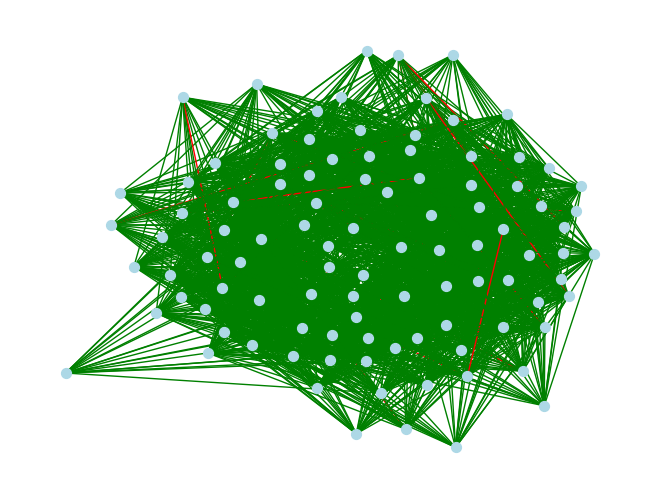

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Ensure 'B' is created first
B = nx.Graph()

for _, row in fraud_train.iterrows():
    B.add_edge(row['customer'], row['merchant'], amount=row['amount'], class_label=row['fraudulent'])

# Now, run the visualization
subgraph_nodes = list(fraud_train['customer'].unique())[:50] + list(fraud_train['merchant'].unique())[:50]
B_sub = B.subgraph(subgraph_nodes)

# Define layout for visualization
pos = nx.spring_layout(B_sub)

# Color edges based on fraud status
edge_colors = ['red' if B_sub[u][v]['class_label'] else 'green' for u, v in B_sub.edges]

# Draw the graph
nx.draw(B_sub, pos, with_labels=False, node_color='lightblue', edge_color=edge_colors, node_size=50)
plt.show()


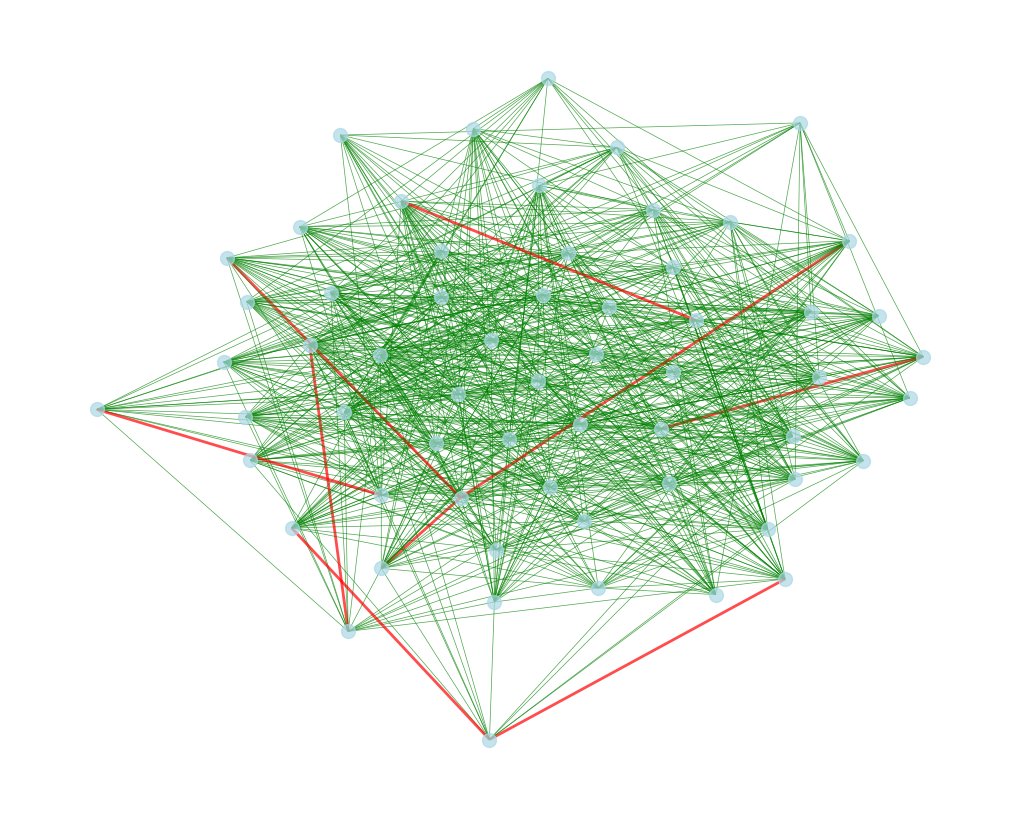

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Select fewer nodes for better clarity
subgraph_nodes = list(fraud_train['customer'].unique())[:30] + list(fraud_train['merchant'].unique())[:30]
B_sub = B.subgraph(subgraph_nodes)

# Adjust layout for better clarity
pos = nx.spring_layout(B_sub, k=0.8)  # k controls node spacing; increase for better separation

# Define edge colors & widths based on fraud status
edge_colors = ['red' if B_sub[u][v]['class_label'] else 'green' for u, v in B_sub.edges]
edge_widths = [2 if B_sub[u][v]['class_label'] else 0.5 for u, v in B_sub.edges]

# Draw the graph
plt.figure(figsize=(10, 8))  # Increase figure size
nx.draw(
    B_sub, pos, with_labels=False, node_color='lightblue',
    edge_color=edge_colors, node_size=100, width=edge_widths, alpha=0.7
)
plt.show()


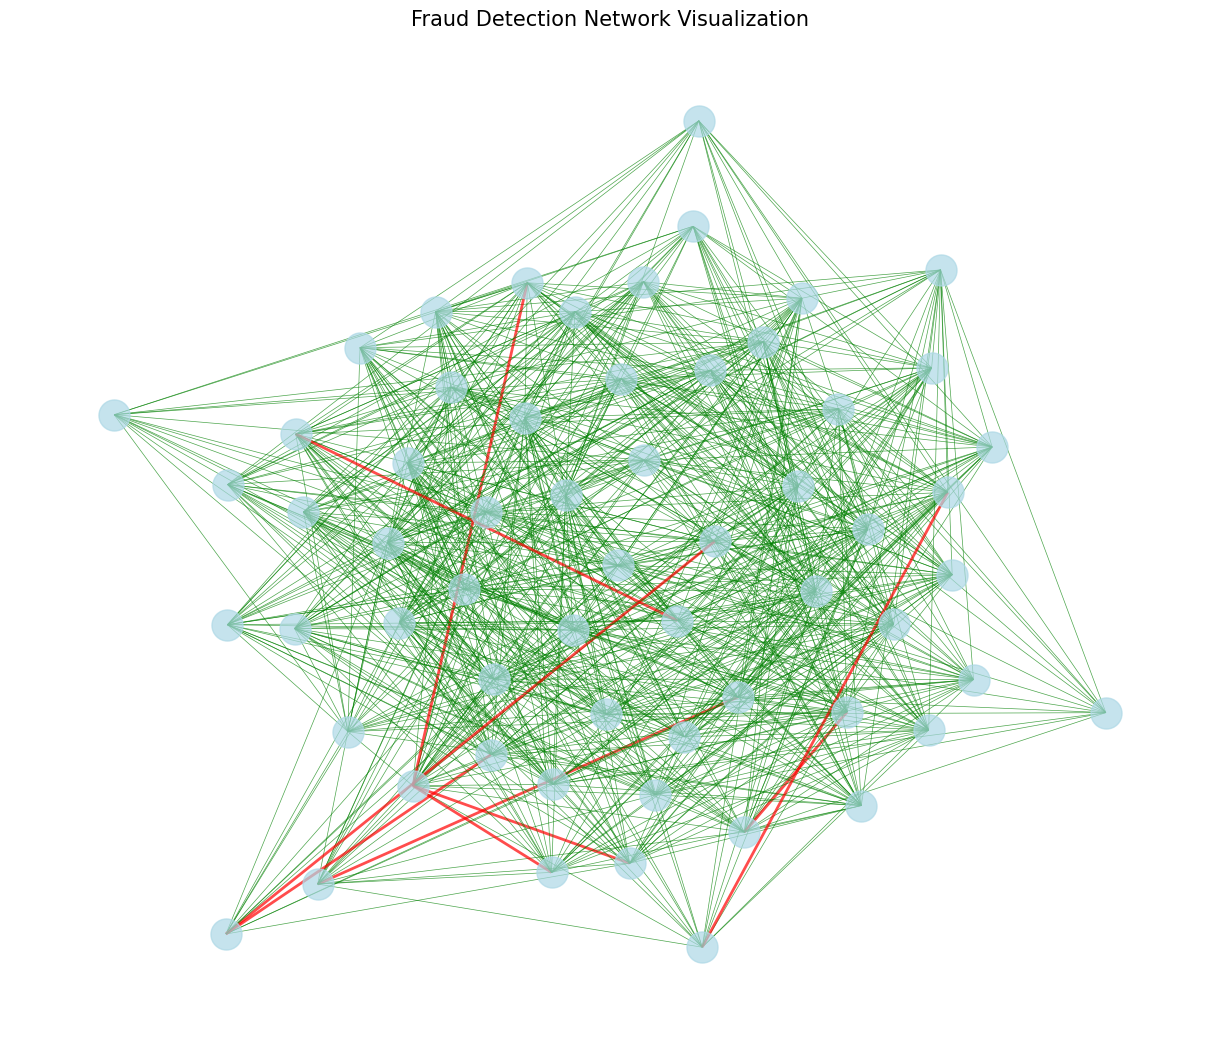

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Select fewer nodes for better clarity
subgraph_nodes = list(fraud_train['customer'].unique())[:30] + list(fraud_train['merchant'].unique())[:30]
B_sub = B.subgraph(subgraph_nodes)

# Adjust layout for better clarity
pos = nx.spring_layout(B_sub, k=1.2, seed=42)  # Increased k for better separation of nodes

# Define edge colors & widths based on fraud status
edge_colors = ['red' if B_sub[u][v]['class_label'] else 'green' for u, v in B_sub.edges]
edge_widths = [2 if B_sub[u][v]['class_label'] else 0.5 for u, v in B_sub.edges]

# Draw the graph with node size, improved layout, and edge attributes
plt.figure(figsize=(12, 10))  # Increased figure size
nx.draw(
    B_sub, pos, with_labels=False, node_color='lightblue',
    edge_color=edge_colors, node_size=500, width=edge_widths, alpha=0.7
)

# Optionally, if you want to add labels for nodes (customers/merchants):
# nx.draw_networkx_labels(B_sub, pos, font_size=10, font_color='black')

plt.title('Fraud Detection Network Visualization', fontsize=15)  # Add a title
plt.show()


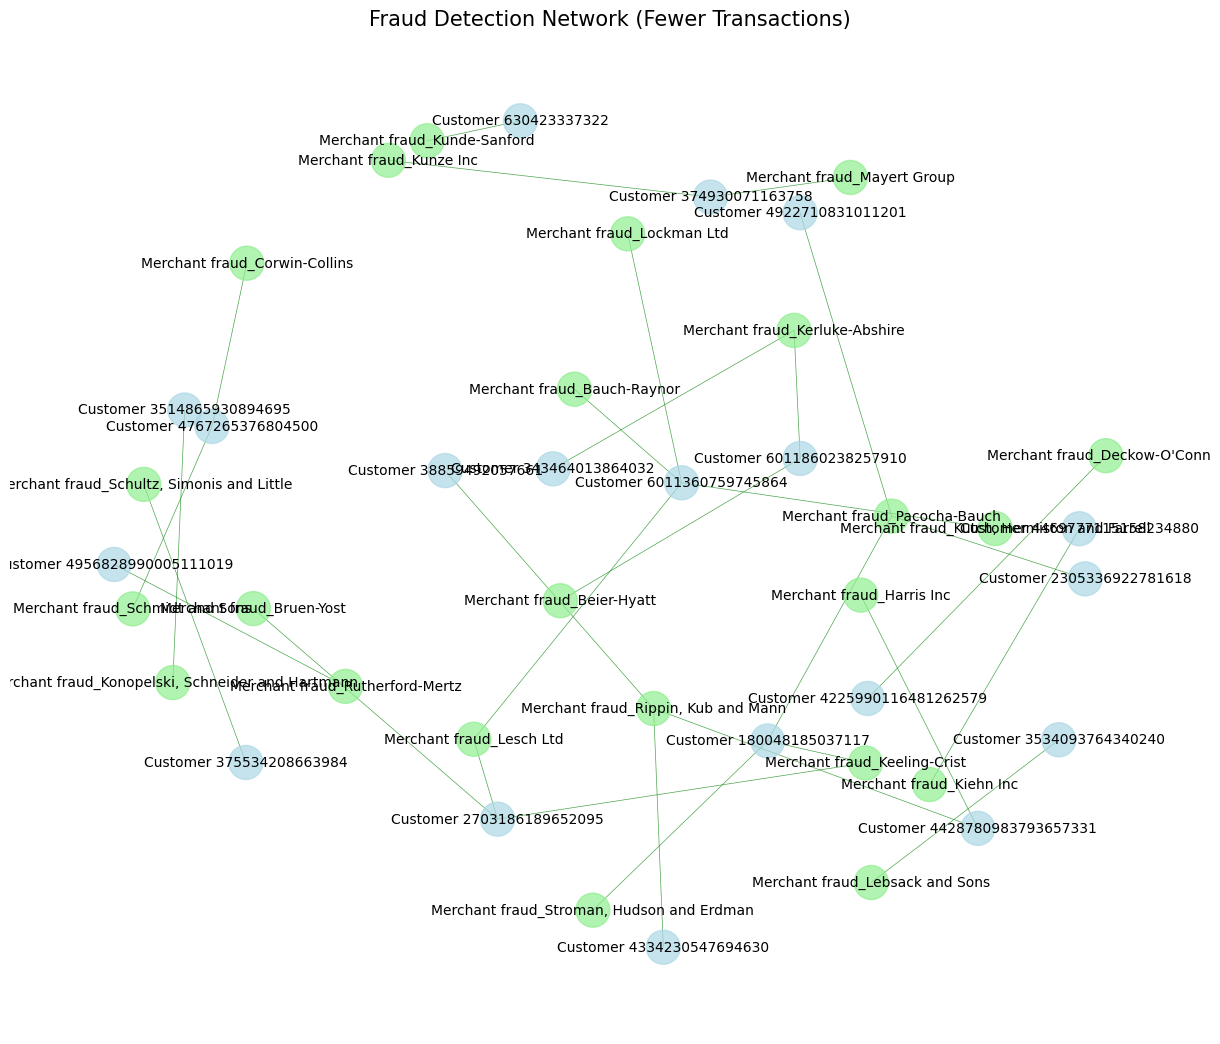

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Select more nodes for better balance and clarity
subgraph_nodes = list(fraud_train['customer'].unique())[:30] + list(fraud_train['merchant'].unique())[:30]  # Increase to 30 nodes
B_sub = B.subgraph(subgraph_nodes)

# Limit the number of transactions (edges) for fewer visualizations
edges_list = list(B_sub.edges)
random.shuffle(edges_list)  # Shuffle edges to sample randomly
num_edges_to_show = 30  # Select fewer transactions (edges)
edges_to_show = edges_list[:num_edges_to_show]  # Limit edges

# Create a subgraph with fewer edges
B_sub_fewer_edges = B.subgraph(subgraph_nodes).edge_subgraph(edges_to_show)

# Define edge colors & widths based on fraud status
edge_colors = ['red' if B_sub_fewer_edges[u][v]['class_label'] else 'green' for u, v in B_sub_fewer_edges.edges]
edge_widths = [2 if B_sub_fewer_edges[u][v]['class_label'] else 0.5 for u, v in B_sub_fewer_edges.edges]

# Adjust layout for better clarity with larger node separation
pos = nx.spring_layout(B_sub_fewer_edges, k=0.8, seed=42)  # k controls spacing; 0.8 gives moderate spacing

# Create labels for nodes based on their type
node_labels = {}
for node in B_sub_fewer_edges.nodes:
    if node in fraud_train['customer'].unique():
        node_labels[node] = f'Customer {node}'  # Label as Customer
    else:
        node_labels[node] = f'Merchant {node}'  # Label as Merchant

# Draw the graph with more nodes and fewer edges (transactions)
plt.figure(figsize=(12, 10))  # Increase figure size for better visibility

# Color nodes based on type: blue for customers, lightgreen for merchants
node_colors = ['lightblue' if node in fraud_train['customer'].unique() else 'lightgreen' for node in B_sub_fewer_edges.nodes]

nx.draw(
    B_sub_fewer_edges, pos, with_labels=False, node_color=node_colors,
    edge_color=edge_colors, node_size=600, width=edge_widths, alpha=0.7
)

# Add labels to the nodes
nx.draw_networkx_labels(B_sub_fewer_edges, pos, labels=node_labels, font_size=10, font_color='black')

# Title and show
plt.title('Fraud Detection Network (Fewer Transactions)', fontsize=15)  # Add a title
plt.show()


In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=affdbc29eb5f79d1a9b19da4acc75c976cad8685d136cc722fedcb396ddb0225
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
# Install libraries if not installed
# !pip install lime scikit-learn pandas numpy matplotlib

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Generate some sample data (similar to fraud detection data)
np.random.seed(0)
data_size = 1000

df = pd.DataFrame({
    'unix_time': np.random.normal(1.5, 0.5, data_size),
    'lat': np.random.normal(0, 1, data_size),
    'city_pop': np.random.normal(1, 0.5, data_size),
    'amt': np.random.normal(0, 1, data_size),
    'merch_long': np.random.normal(0, 1, data_size),
    'merch_lat': np.random.normal(0, 1, data_size),
    'long': np.random.normal(0, 1, data_size),
    'fraud': np.random.choice([0, 1], data_size, p=[0.8, 0.2])
})

# Features and labels
X = df.drop('fraud', axis=1)
y = df['fraud']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Create LIME explainer
explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Legitimate', 'Fraudulent'],
    mode='classification'
)

# Pick a random test sample
i = 5
exp = explainer.explain_instance(X_test.iloc[i], model.predict_proba)

# Show the explanation
exp.show_in_notebook(show_table=True, show_all=False)

# If you want to save as HTML and open separately:
# exp.save_to_file('lime_explanation.html')


/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

In [ ]:
# Install libraries if not installed
# !pip install lime scikit-learn pandas numpy matplotlib

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(42)

# Create synthetic data similar to your case
data_size = 1000
df = pd.DataFrame({
    'unix_time': np.random.normal(2, 0.5, data_size),
    'lat': np.random.normal(0, 1, data_size),
    'city_pop': np.random.normal(1, 0.5, data_size),
    'amt': np.random.normal(0, 1, data_size),
    'merch_long': np.random.normal(0, 1, data_size),
    'merch_lat': np.random.normal(0, 1, data_size),
    'long': np.random.normal(0, 1, data_size),
    'fraud': np.random.choice([0, 1], data_size, p=[0.75, 0.25])  # 75% Legit, 25% Fraud
})

# Features and labels
X = df.drop('fraud', axis=1)
y = df['fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Set up LIME explainer
explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Legitimate', 'Fraudulent'],
    mode='classification',
    discretize_continuous=True  # THIS makes it match your screenshot better
)

# Select a test instance to explain
i = 5  # (you can change this)
exp = explainer.explain_instance(X_test.iloc[i], model.predict_proba, num_features=7)

# Show the explanation
exp.show_in_notebook(show_table=True, show_all=False)

# If you want to save it to a file instead:
# exp.save_to_file('lime_explanation.html')


/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.